In [1]:
%matplotlib notebook
import numpy as np
import time

from qastools.interpolation import interpolate_and_save
from databroker import Broker
db = Broker.named("qas")
import matplotlib.pyplot as plt

# set up the client
from distributed import Client
client = Client("xf07bm-ws1:8786")

In [2]:
uid= db[-2].start['uid']
#uid = "94ffd468-746c-4817-8740-30fa68780c50"

# good data set
uid = "49a7f2e2-04ea-4c86-a2f9-3814bf8a13de"

# bad data set:  Cu March 25th
uid = 'e7fb2250-fd68-4971-b589-cef552e075dd'

print(uid)
print(time.ctime(db[uid].start['time']))

future = client.submit(interpolate_and_save,'qas', 'qas-analysis',
                       uid, mono_name='mono1_enc', pulses_per_degree=None, e0=8979)

interp_df_future = client.submit(lambda x : x['interp_df'], future)
bin_df_future = client.submit(lambda x : x['bin_df'], future)




e7fb2250-fd68-4971-b589-cef552e075dd
Fri Mar 23 17:51:31 2018


In [3]:
# fetch the result
res = future.result()
interp_df_filename = res['interp_df_filename']
bin_df_filename = res['bin_df_filename']

interp_df = interp_df_future.result()
bin_df = bin_df_future.result()

print("saved interp_df to {}".format(interp_df_filename))
print("saved bin_df to {}".format(bin_df_filename))

saved interp_df to /nsls2/xf07bm/data/interpolated_data/2018/03/26/xas_Cu foil 03-23-18_213-5.txt
saved bin_df to /nsls2/xf07bm/data/interpolated_data/2018/03/26/xas_Cu foil 03-23-18_213-5.dat


<IPython.core.display.Javascript object>


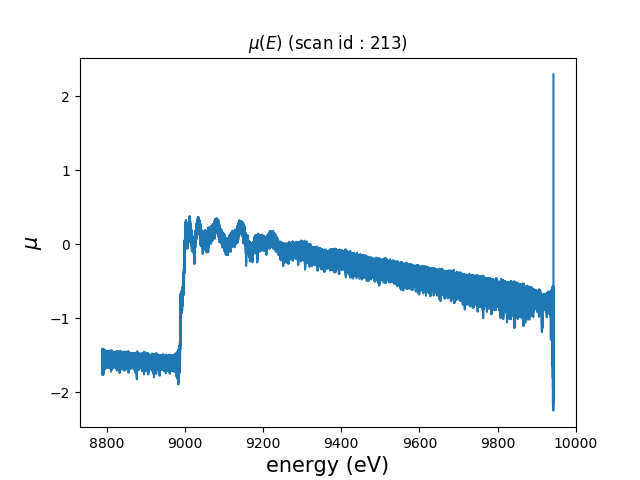

/home/xf07bm/conda_envs/collection-local/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in log
  


In [12]:
plt.figure();
#plt.plot(interp_df.energy, np.log(interp_df.i0/interp_df.it))

#plt.plot(interp_df.it)
#plt.plot(interp_df.energy, np.log(interp_df.i0/interp_df.it))
plt.plot( interp_df.energy, np.log(interp_df.i0/interp_df.it))
#plt.plot(interp_df.energy)
plt.xlabel("energy (eV)", size=15)
plt.ylabel("$\mu$", size=15)
plt.title("$\mu (E)$ (scan id : {})".format(res['scan_id']))
#plt.plot(interp_df.energy,'+')

In [4]:
print(db[uid].start)
print(db[uid].stop)


Run Start
PI              : No PI                                   
PROPOSAL        : None                                    
SAF             : None                                    
angle_offset    : -0.0998577922152                        
beamline_id     : QAS                                     
comment         :                                         
cycle           : 1                                       
edge            : K                                       
element         : Copper ( 29)                            
experiment      : transmission                            
group           : qas                                     
name            : Cu foil 03-23-18                        
pba1_adc6 offset: 0.7293556875478722                      
pba1_adc7 offset: -0.4852680000000001                     
plan_args       :
plan_name       : execute_trajectory                      
plan_type       : generator                               
proposal_id     : None     

<IPython.core.display.Javascript object>


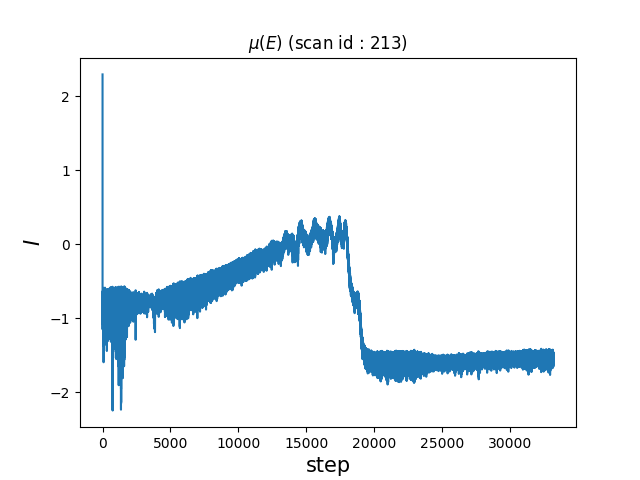

/home/xf07bm/conda_envs/collection-local/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in log
  import sys


In [14]:

plt.figure(0);
#plt.plot(interp_df.energy, np.log(interp_df.i0/interp_df.it))

#plt.plot(interp_df.it)
#plt.plot(interp_df.energy, np.log(interp_df.i0/interp_df.it))
plt.plot( np.log(interp_df.i0/interp_df.it))
#plt.plot(interp_df.energy)
plt.xlabel("step", size=15)
plt.ylabel("$I$", size=15)
plt.title("$\mu (E)$ (scan id : {})".format(res['scan_id']))
#plt.plot(interp_df.energy,'+')

<IPython.core.display.Javascript object>


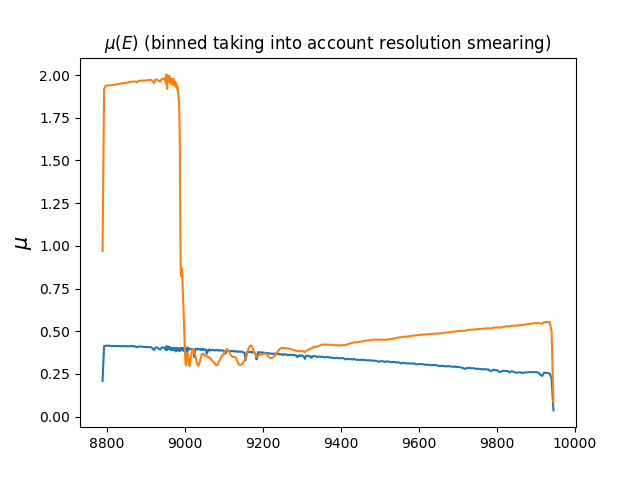

In [16]:
plt.figure(1)
plt.plot(bin_df.energy, bin_df.i0)
plt.plot(bin_df.energy, bin_df.it)
plt.ylabel("$\mu$", size=15)
plt.title("$\mu (E)$")
plt.title("$\mu (E)$ (binned taking into account resolution smearing)")

<IPython.core.display.Javascript object>


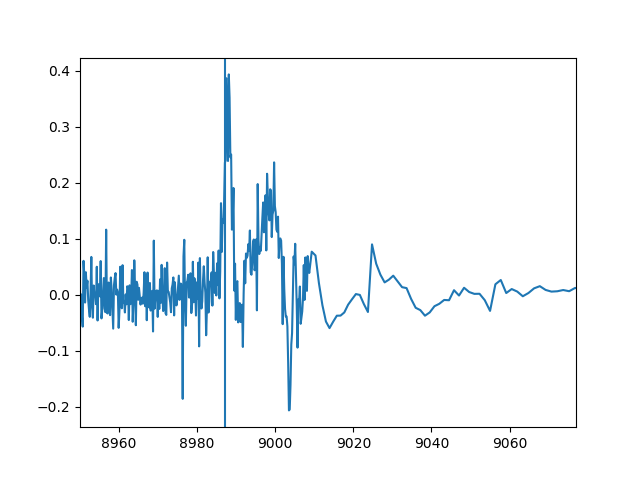

(8950, 9077)

In [7]:
# finding the edge
avg_energy = (bin_df.energy.values[1:] + bin_df.energy.values[:-1])*.5

plt.figure(2);plt.clf()
plt.plot(avg_energy, np.diff(np.log(bin_df.i0/bin_df.it))/np.diff(bin_df.energy))
plt.axvline(8987)
plt.xlim(8950, 9077)

<IPython.core.display.Javascript object>


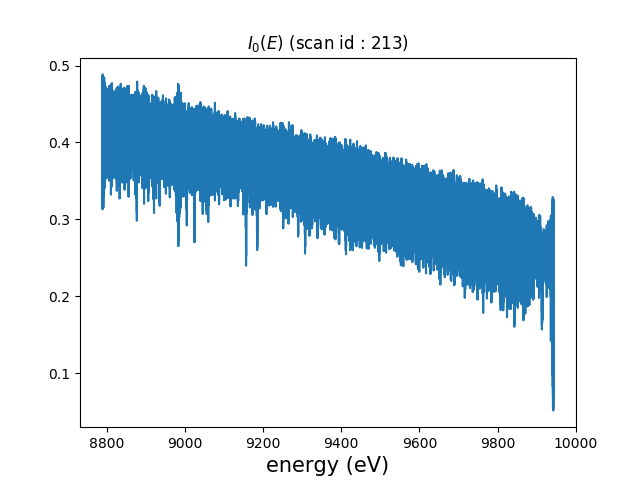

<IPython.core.display.Javascript object>


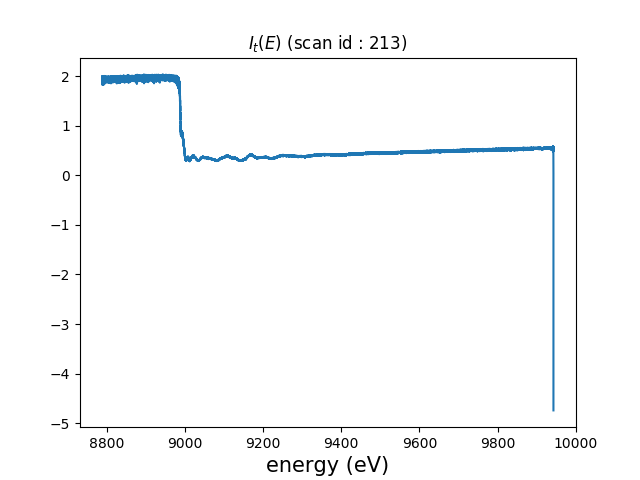

In [10]:
# plot the components:
#plt.plot(interp_df.it)
plt.figure()
plt.plot(interp_df.energy, interp_df.i0)
#plt.plot(interp_df.energy)
plt.xlabel("energy (eV)", size=15)

plt.title("$I_0(E)$ (scan id : {})".format(res['scan_id']))
#plt.plot(interp_df.energy,'+')

# plot the components:
#plt.plot(interp_df.it)
plt.figure()
plt.plot(interp_df.energy, interp_df.it)
#plt.plot(interp_df.energy)
plt.xlabel("energy (eV)", size=15)

plt.title("$I_t(E)$ (scan id : {})".format(res['scan_id']))
#plt.plot(interp_df.energy,'+')